In [1]:
%matplotlib inline

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split
import time

In [ ]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
y_train = y_train.reshape((y_train.shape[0], -1))
y_val = y_val.reshape((y_val.shape[0], -1))
y_test = y_test.reshape((y_test.shape[0], -1))


In [ ]:
print("Training data shape (X):", x_train.shape)
print("Training labels shape (y):", y_train.shape)
print("Test data shape (X):", x_test.shape)
print("Test labels shape (y):", y_test.shape)
print("Validation data shape (X):", x_val.shape)
print("Validation labels shape (y):", y_val.shape)

Training data shape (X): (41999, 3072)
Training labels shape (y): (41999, 1)
Test data shape (X): (6001, 3072)
Test labels shape (y): (6001, 1)
Validation data shape (X): (12000, 3072)
Validation labels shape (y): (12000, 1)


ValueError: cannot reshape array of size 3072 into shape (28,28)

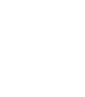

In [ ]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

In [ ]:
class NonlinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(16, activation='relu')

        self.layer_2 = tf.keras.layers.Dense(16, activation='relu')
        self.drop_3 = tf.keras.layers.Dropout(0.2)
        self.layer_4 = tf.keras.layers.Dense(16, activation='relu')
        self.drop_5 = tf.keras.layers.Dropout(0.2)

        # The last layer needs to be like this:
        self.layer_out = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)

        # The more complex version:
        x = self.layer_2(x)
        x = self.drop_3(x)
        x = self.layer_4(x)
        x = self.drop_5(x)


        x = self.layer_out(x)

        return x

In [ ]:
nonlinear_model = NonlinearClassifier()
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)
# Compile the model using the configured optimizer
nonlinear_model.compile(optimizer=optimizer)
nonlinear_model.compile(loss="sparse_categorical_crossentropy",
                        optimizer=optimizer,
                        metrics=['accuracy'])

In [ ]:
%%time

epochs = 30
batch_size = 300

history = nonlinear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
140/140 - 3s - loss: 7.0543 - accuracy: 0.0975 - 3s/epoch - 22ms/step
Epoch 2/30
140/140 - 1s - loss: 2.3027 - accuracy: 0.0993 - 1s/epoch - 8ms/step
Epoch 3/30
140/140 - 1s - loss: 2.3026 - accuracy: 0.0987 - 1s/epoch - 8ms/step
Epoch 4/30
140/140 - 1s - loss: 2.3028 - accuracy: 0.0990 - 1s/epoch - 8ms/step
Epoch 5/30
140/140 - 1s - loss: 2.3025 - accuracy: 0.0991 - 1s/epoch - 9ms/step
Epoch 6/30
140/140 - 1s - loss: 2.3026 - accuracy: 0.1002 - 1s/epoch - 10ms/step
Epoch 7/30
140/140 - 1s - loss: 2.3026 - accuracy: 0.0997 - 1s/epoch - 9ms/step
Epoch 8/30
140/140 - 1s - loss: 2.3026 - accuracy: 0.1007 - 998ms/epoch - 7ms/step
Epoch 9/30
140/140 - 1s - loss: 2.3027 - accuracy: 0.1016 - 1s/epoch - 11ms/step
Epoch 10/30
140/140 - 2s - loss: 2.3026 - accuracy: 0.0987 - 2s/epoch - 11ms/step
Epoch 11/30
140/140 - 2s - loss: 2.3026 - accuracy: 0.1001 - 2s/epoch - 11ms/step
Epoch 12/30
140/140 - 1s - loss: 2.3026 - accuracy: 0.0989 - 1s/epoch - 8ms/step
Epoch 13/30
140/140 - 1s - lo

In [ ]:
%%time

epochs = 30
batch_size = 300

history = nonlinear_model.fit(x_val, y_val, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val))

Epoch 1/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0999 - 850ms/epoch - 21ms/step
Epoch 2/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.0999 - 600ms/epoch - 15ms/step
Epoch 3/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0999 - 718ms/epoch - 18ms/step
Epoch 4/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0999 - 680ms/epoch - 17ms/step
Epoch 5/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0999 - 642ms/epoch - 16ms/step
Epoch 6/30
40/40 - 1s - loss: 2.3025 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0999 - 503ms/epoch - 13ms/step
Epoch 7/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0999 - 641ms/epoch - 16ms/step
Epoch 8/30
40/40 - 1s - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0999 - 689ms/epoch - 17ms/step
Epoch 9/

In [ ]:
%%time

epochs = 30
batch_size = 300

history = nonlinear_model.fit(x_test, y_test, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val))

Epoch 1/30
21/21 - 0s - loss: 2.3056 - accuracy: 0.0923 - val_loss: 2.3026 - val_accuracy: 0.0999 - 491ms/epoch - 23ms/step
Epoch 2/30
21/21 - 1s - loss: 2.3020 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.1034 - 524ms/epoch - 25ms/step
Epoch 3/30
21/21 - 0s - loss: 2.3034 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1034 - 409ms/epoch - 19ms/step
Epoch 4/30
21/21 - 1s - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1034 - 776ms/epoch - 37ms/step
Epoch 5/30
21/21 - 0s - loss: 2.3025 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1034 - 347ms/epoch - 17ms/step
Epoch 6/30
21/21 - 0s - loss: 2.3024 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1034 - 325ms/epoch - 15ms/step
Epoch 7/30
21/21 - 0s - loss: 2.3034 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1034 - 340ms/epoch - 16ms/step
Epoch 8/30
21/21 - 0s - loss: 2.3023 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.0999 - 457ms/epoch - 22ms/step
Epoch 9/

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

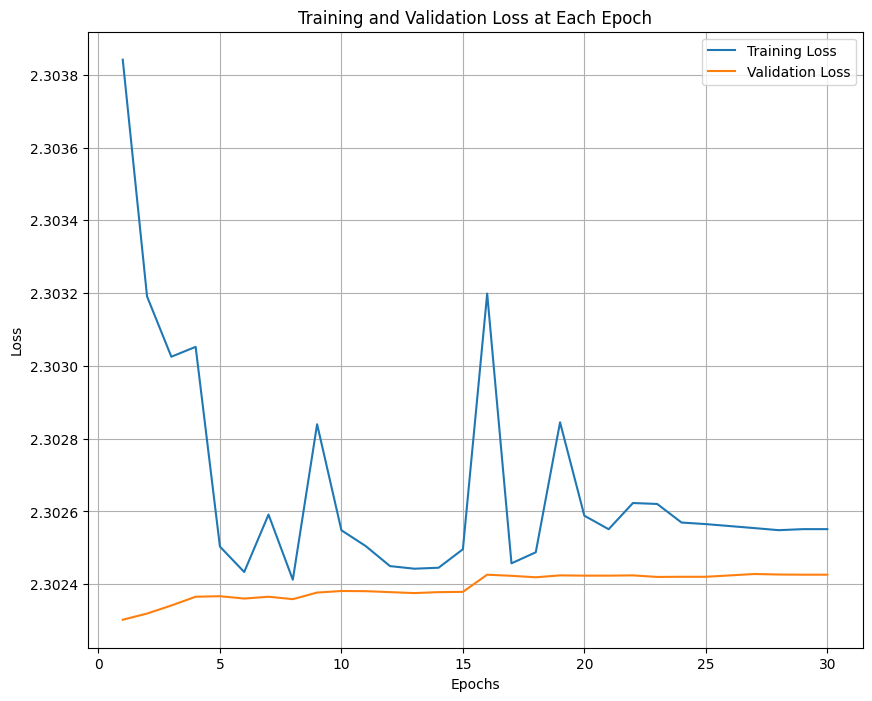

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss at Each Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
nonlinscores = nonlinear_model.evaluate(x_train, y_train, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

nonlinscores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

nonlinscores = nonlinear_model.evaluate(x_val, y_val, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], nonlinscores[1]*100))

1313/1313 - 2s - loss: 2.3024 - accuracy: 0.0987 - 2s/epoch - 2ms/step
accuracy: 9.87%
188/188 - 0s - loss: 2.3026 - accuracy: 0.1015 - 306ms/epoch - 2ms/step
accuracy: 10.15%
375/375 - 1s - loss: 2.3024 - accuracy: 0.1041 - 556ms/epoch - 1ms/step
accuracy: 10.41%


In [ ]:
 # def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
#     rounded = np.argmax(predictions, axis=1)
#     errors = rounded!=y_true
#     print('Showing max', maxtoshow, 'first failures. '
#           'The predicted class is shown first and the correct class in parenthesis.')
#     ii = 0
#     plt.figure(figsize=(maxtoshow, 1))
#     for i in range(x_test.shape[0]):
#         if ii>=maxtoshow:
#             break
#         if errors[i]:
#             if trueclass is not None and y_test[i] != trueclass:
#                 continue
#             if predictedclass is not None and rounded[i] != predictedclass:
#                 continue
#             plt.subplot(1, maxtoshow, ii+1)
#             plt.axis('off')
#             plt.imshow(x_test[i,:,:], cmap="gray")
#             plt.title("%d (%d)" % (rounded[i], y_test[i]))
#             ii = ii + 1

In [ ]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10, y_true=None): # Added y_true parameter
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_true # Use the y_true passed to the function
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and rounded[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

In [ ]:
nonlinpredictions = nonlinear_model.predict(x_test)

show_failures(nonlinpredictions, y_true=y_test) # Pass y_test to the function

188/188 [==============================] - 0s 2ms/step
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x100 with 0 Axes>

1532/1532 [==============================] - 3s 2ms/step
Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


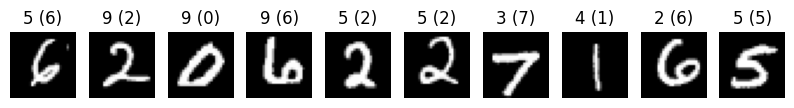

In [ ]:
nonlinpredictions = nonlinear_model.predict(x_train)

show_failures(nonlinpredictions, y_true=y_train) # Pass y_train to the function